In [1]:
# required libraries
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the dataset

df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [3]:
# few the first few records of the dataframe

df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [50]:
df.shape

# there are 5000 rows and 14 columns

(5000, 14)

In [4]:
# view the datatype of each feature

df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [5]:
# check if there are any missing values in any columns

df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [6]:
# view the descriptive statistics of numerical variables

df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [7]:
# convert the negative values in 'Experience' to their absolute value

df['Experience'] = df['Experience'].abs()

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [8]:
# Column descriptions

##	Data Description:
##	ID	Customer ID
##	Age	Customer's age in completed years
##	Experience	#years of professional experience
##	Income	Annual income of the customer ($000)
##	ZIPCode	Home Address ZIP code.
##	Family	Family size of the customer
##	CCAvg	Avg. spending on credit cards per month ($000)
##	Education	Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
##	Mortgage	Value of house mortgage if any. ($000)
##	Personal Loan	Did this customer accept the personal loan offered in the last campaign?
##	Securities Account	Does the customer have a securities account with the bank?
##	CD Account	Does the customer have a certificate of deposit (CD) account with the bank?
##	Online	Does the customer use internet banking facilities?
##	CreditCard	Does the customer use a credit card issued by UniversalBank?

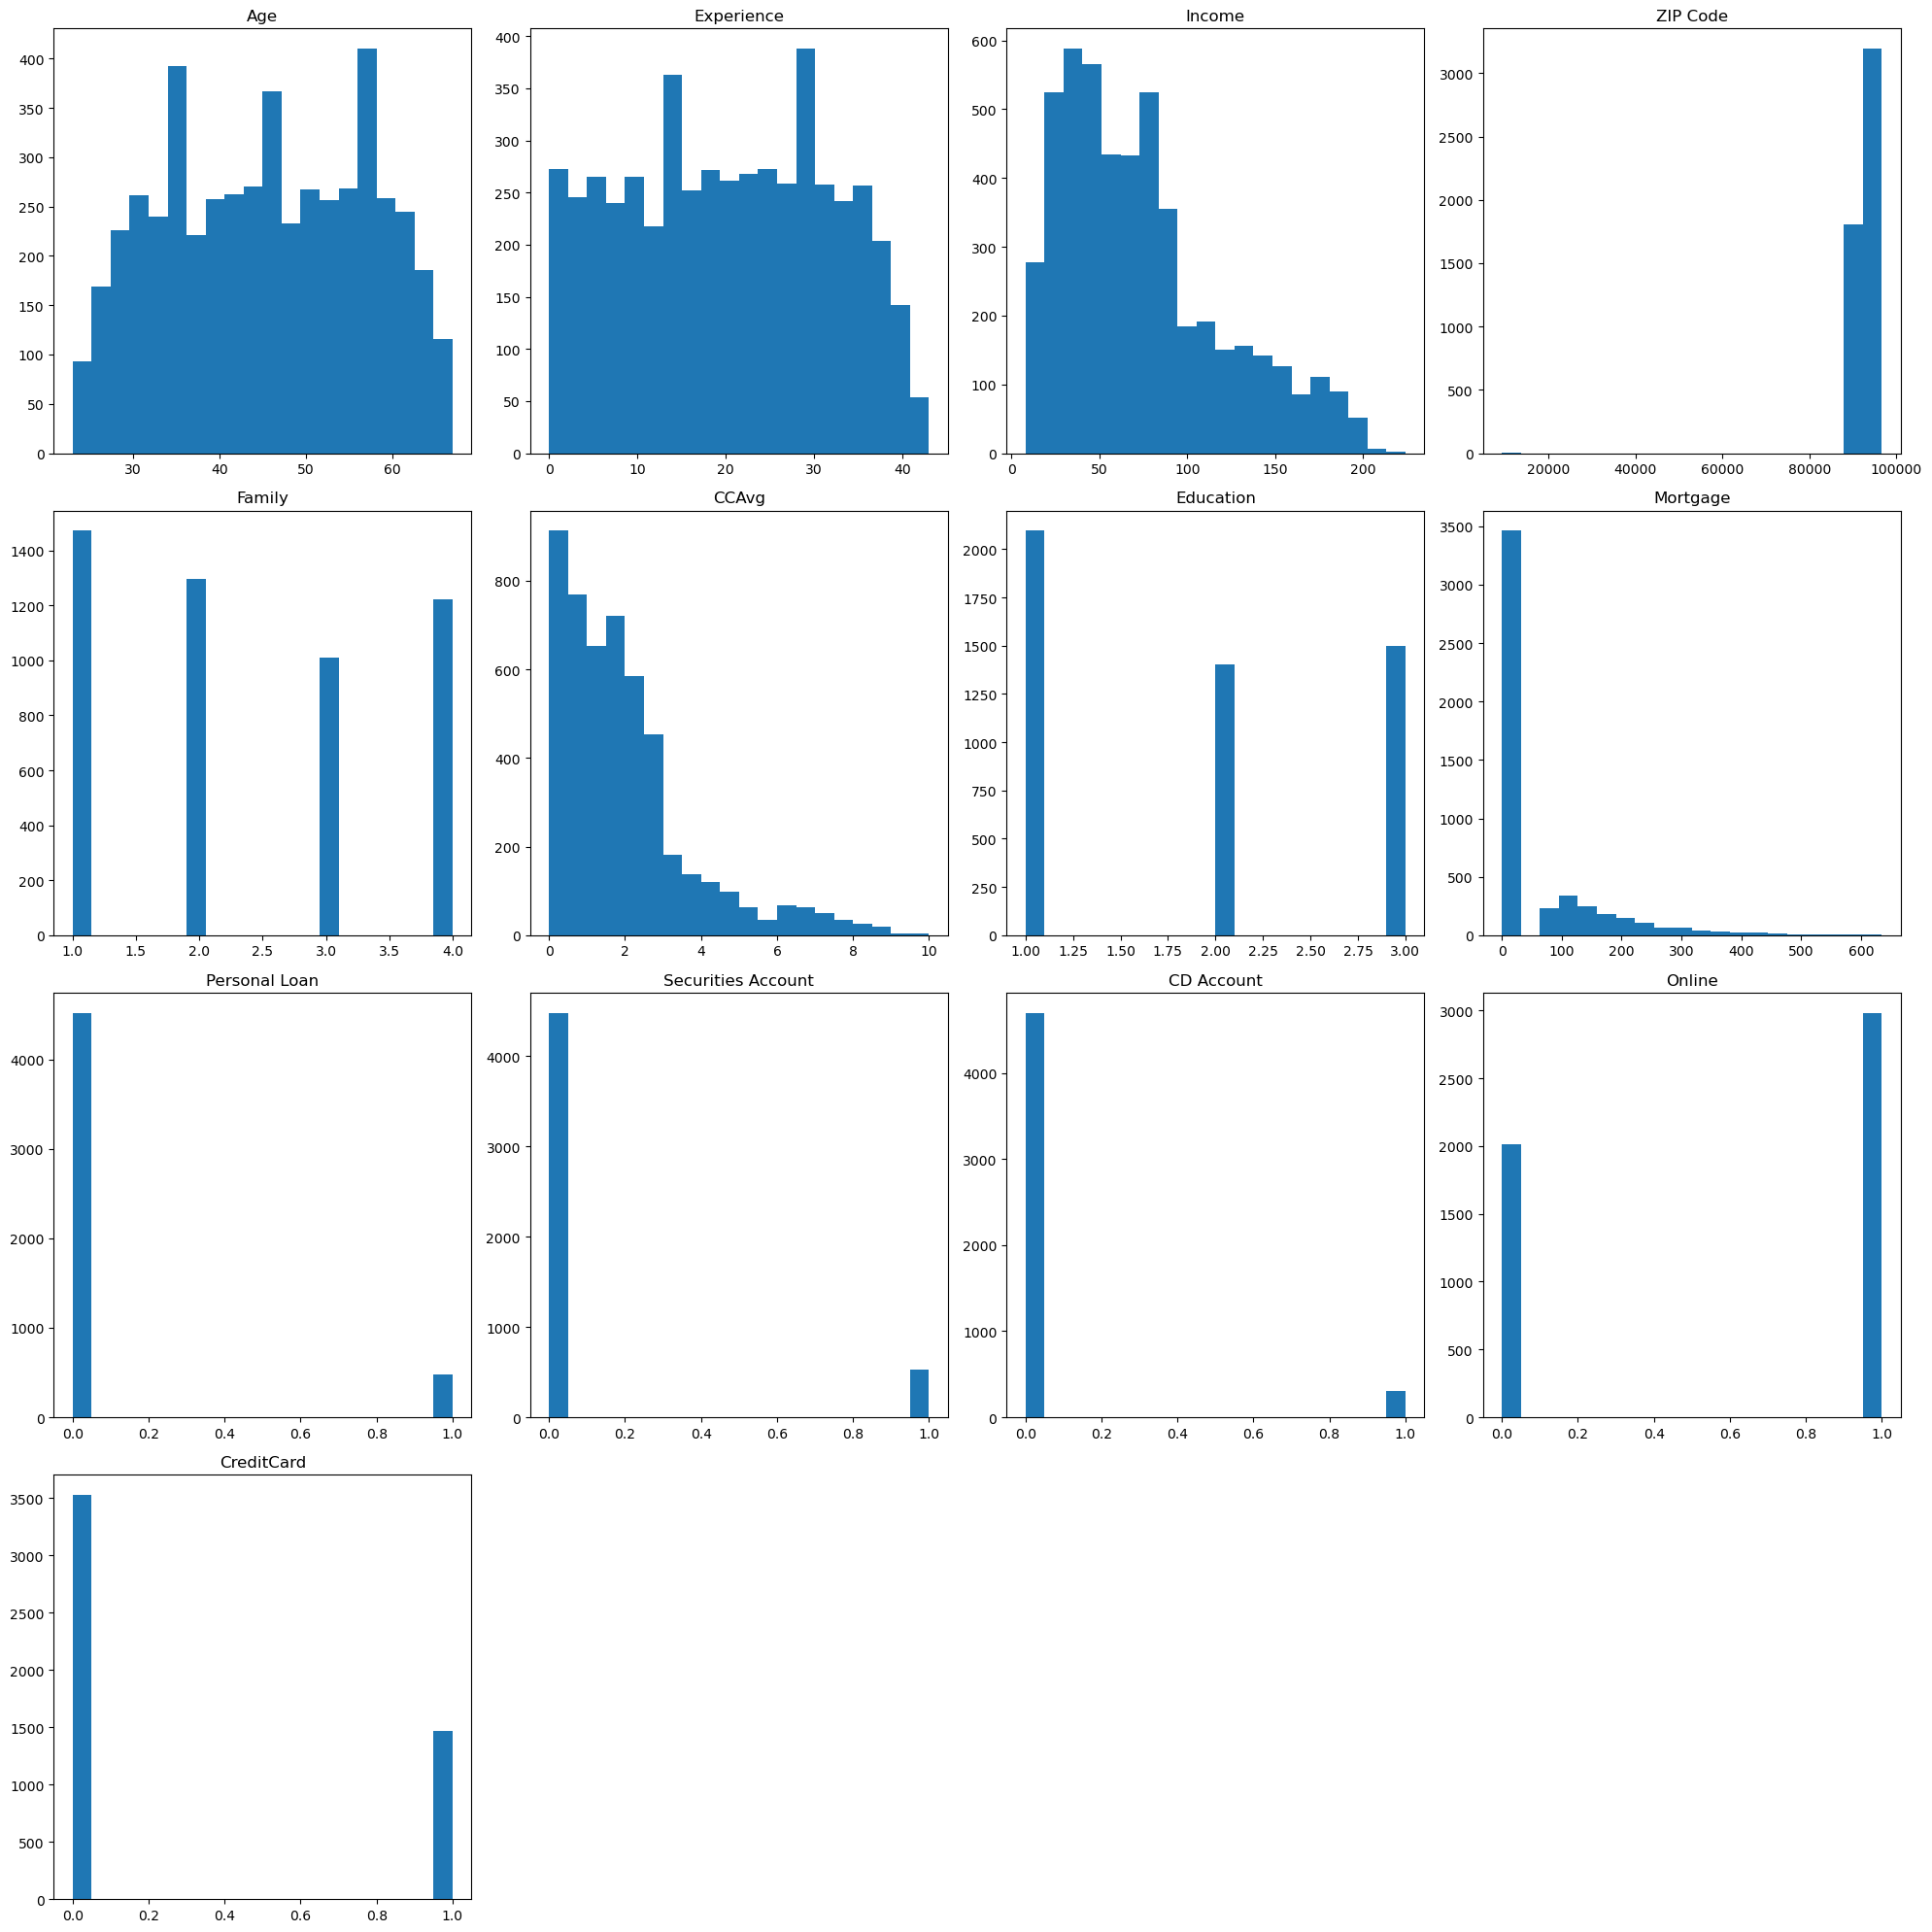

In [9]:
# let's look at the distribution of each feature in our dataset

# use subplots to plot the graphs
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20,20))

for i, column in enumerate(df.columns[1:]):
    ax = axes[i//4, i%4]
    ax.hist(df[column], bins=20)
    ax.set_title(column)

# remove unnecessary subplots
for ax in axes[3:, 1:].flat:
    ax.remove()
    
# for correct spacing
plt.tight_layout()

plt.show()


In [10]:
# roughly estimating, we can say that the dataset has more records of people of 'Age' "35", "45" and "55"

# there are few people with "Experience" more than 35 

# the annual "Income" feature is positively skewed as is it is in most of the cases

# the "Zip Code" falls in certain range denoting that the records are from a certain locations or from certain branches of 
# the bank

# most of the people live alone and there isn't much difference in the number of people with 2, 3 or 4 members in the family

# the "CCAvg" is also positively skewed with most people not spending money via Credit Cards. This is supported by the fact 
# that most people don not own a "CreditCard"

# many people fall under the "Education" category '1'(undergrad)

# most people haven't opted for "Mortgage"

# the targer variable is also skewed 

# most of the records also don't have "Securities Account" and "CD Account" associated with the bank

# more people have "Online"(Internet) banking facilities

In [11]:
df.groupby(["Personal Loan"]).count()  
#The data set is skewed in terms of target column.
# There are far few records in class 1 i.e. people who took the personal loan last time. But that 
# is the class of interst to us! We have to identify potential customers and do not want any potential
# customer to be missed. So we have to look at certain classification metrics

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480,480


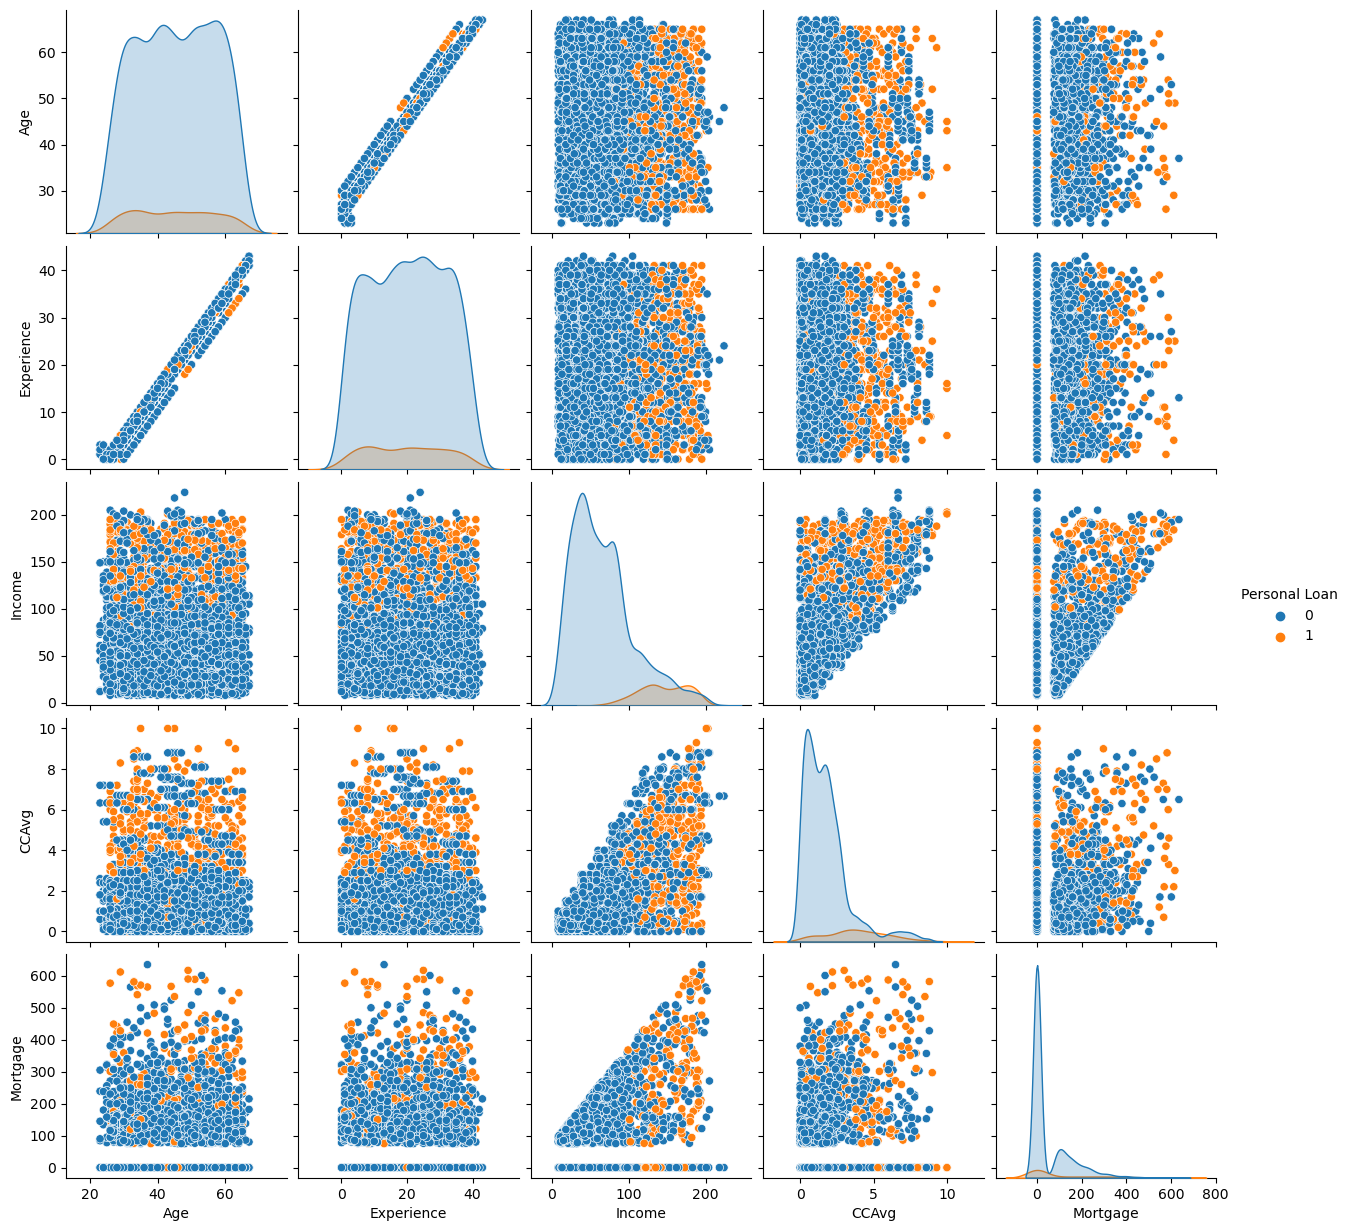

In [12]:
# view the pairwise relationship of the continuous features with "Personal Loan" representing hue

df_attr = df[['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage', 'Personal Loan']]
sns.pairplot(df_attr, hue= 'Personal Loan')

In [13]:
# the one thing that stands out is that more people have purchased 'Personal Loan' who have higher 'Income'
# so, the bank may be more interested to look more into people who have high income

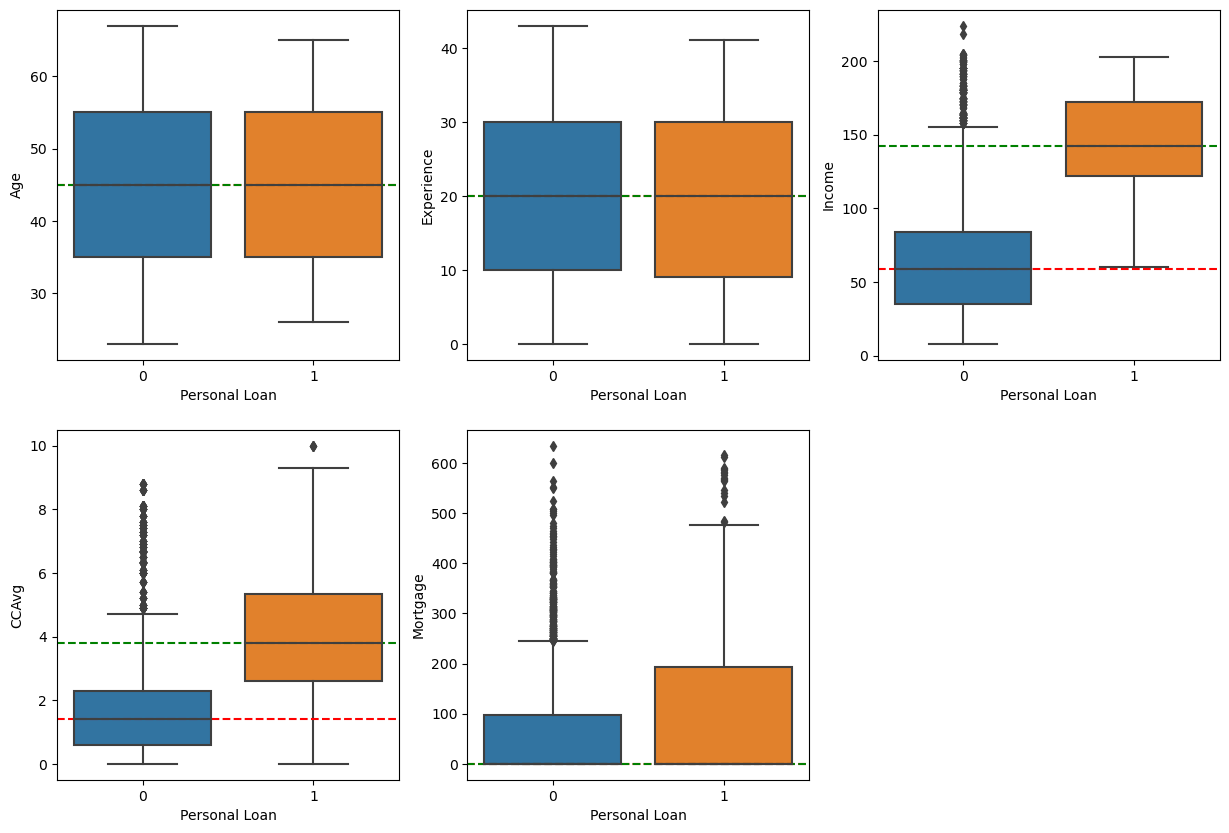

In [14]:
# view the data distribution of each continuous variable against each class of the target variable (0 and 1)

cont_vars = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for i, var in enumerate(cont_vars):
    sns.boxplot(x='Personal Loan', y=var, data=df, ax=axes[i//3, i%3],)
    median = df.groupby('Personal Loan')[var].median().values
    axes[i//3, i%3].axhline(median[0], color='r', linestyle='--')
    axes[i//3, i%3].axhline(median[1], color='g', linestyle='--')

# remove the last subplot
axes[1,2].remove()

plt.show()

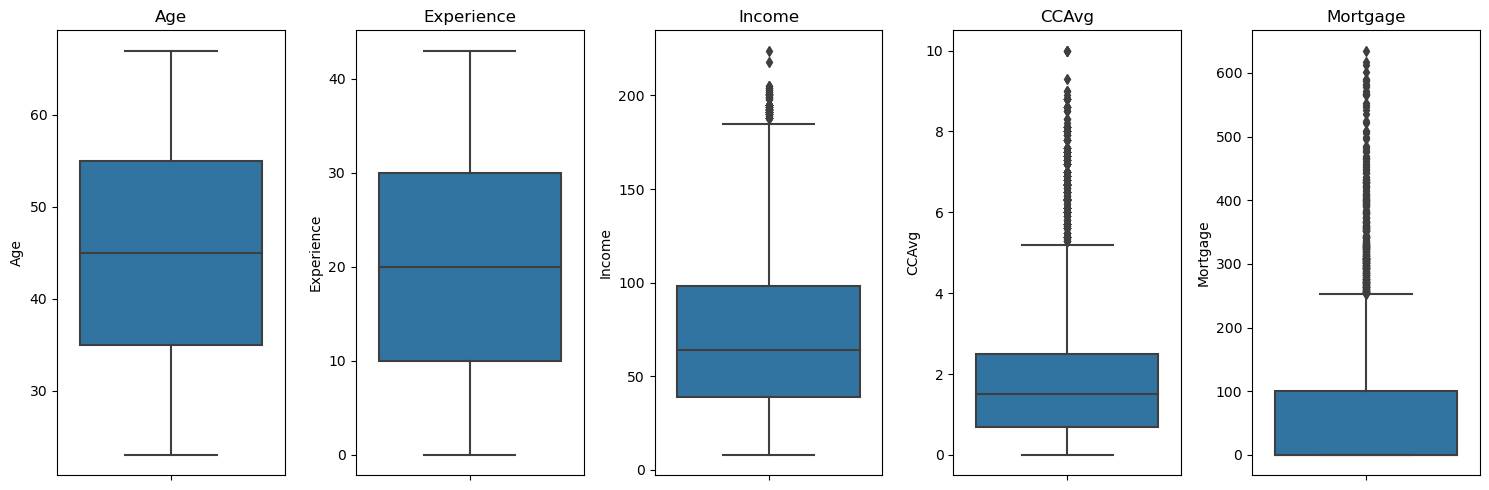

In [15]:
# detecting outliers in the continuous variables

fig, axes = plt.subplots(nrows=1, ncols=len(cont_vars), figsize=(15, 5))

for i, var in enumerate(cont_vars):
    sns.boxplot(y=df[var], ax=axes[i])
    axes[i].set_title(var)

plt.tight_layout()
plt.show()

In [16]:
# the 'Income'feature has only upper outliers as expected
# also, most people don't have Credit Card and have not taken Mortgage,so there are only upper outliers for these 2 features
# I didn't deal with the outliers since they are valid outliers and it did not change much concerning the score of 
# the forthcoming models

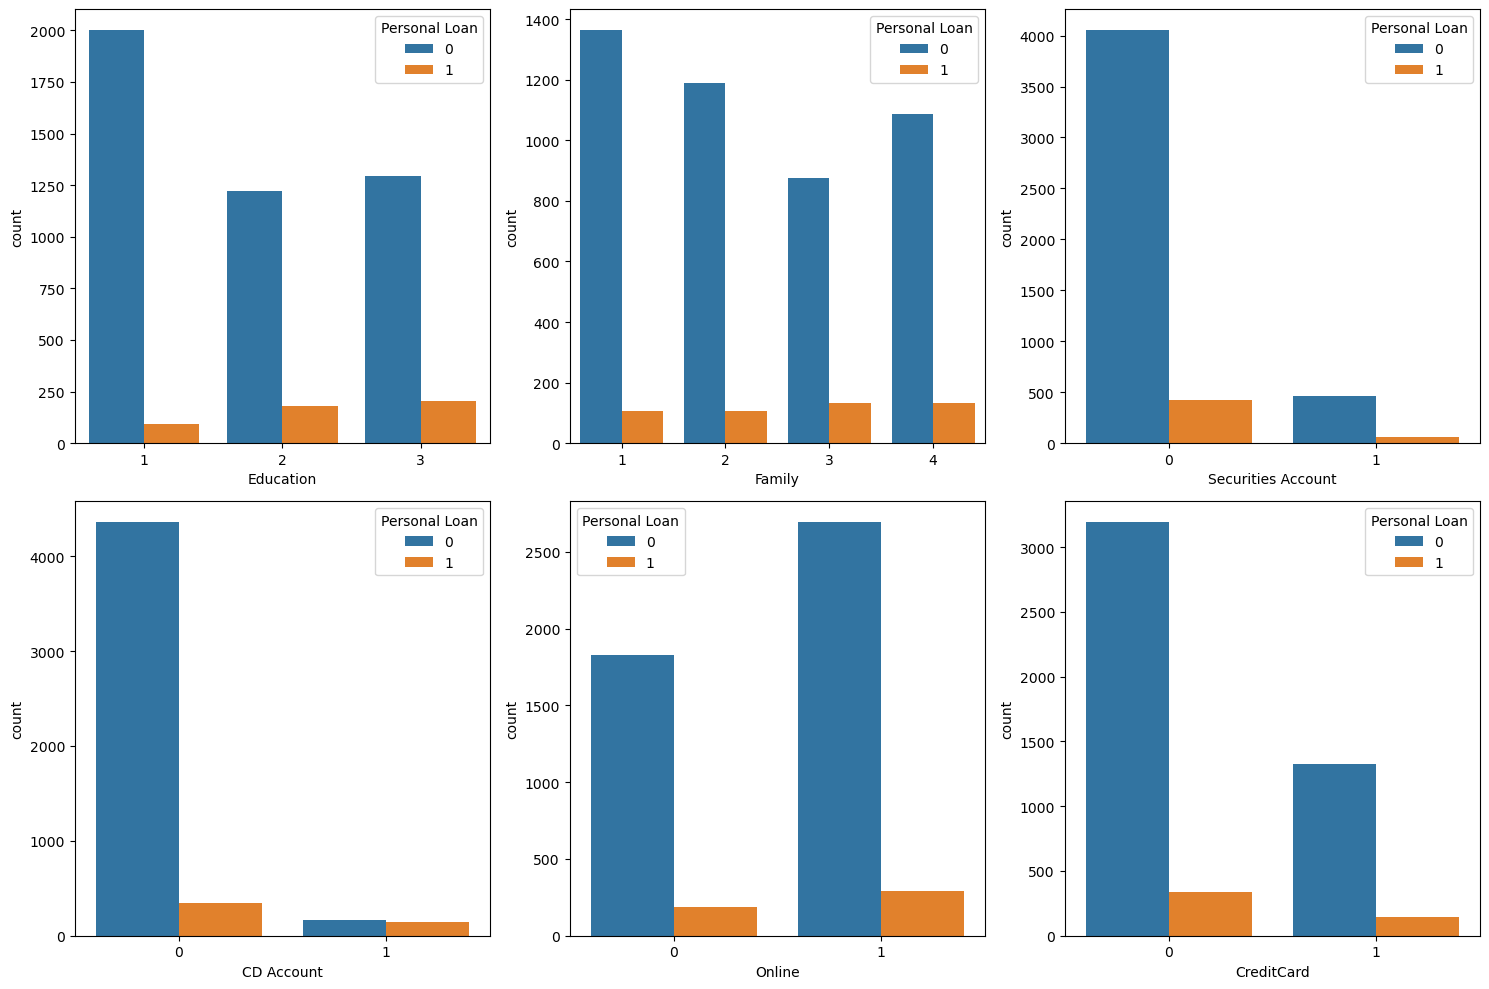

In [17]:
# view the number(count) of each class of categorical variable against each class of the target variable(0 and 1)

cat_vars = ['Education', 'Family','Securities Account', 'CD Account', 'Online', 'CreditCard']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

[ sns.countplot(x=var, hue='Personal Loan', data=df, ax=axes[i//3, i%3]) for i, var in enumerate(cat_vars)]

plt.tight_layout()
plt.show()


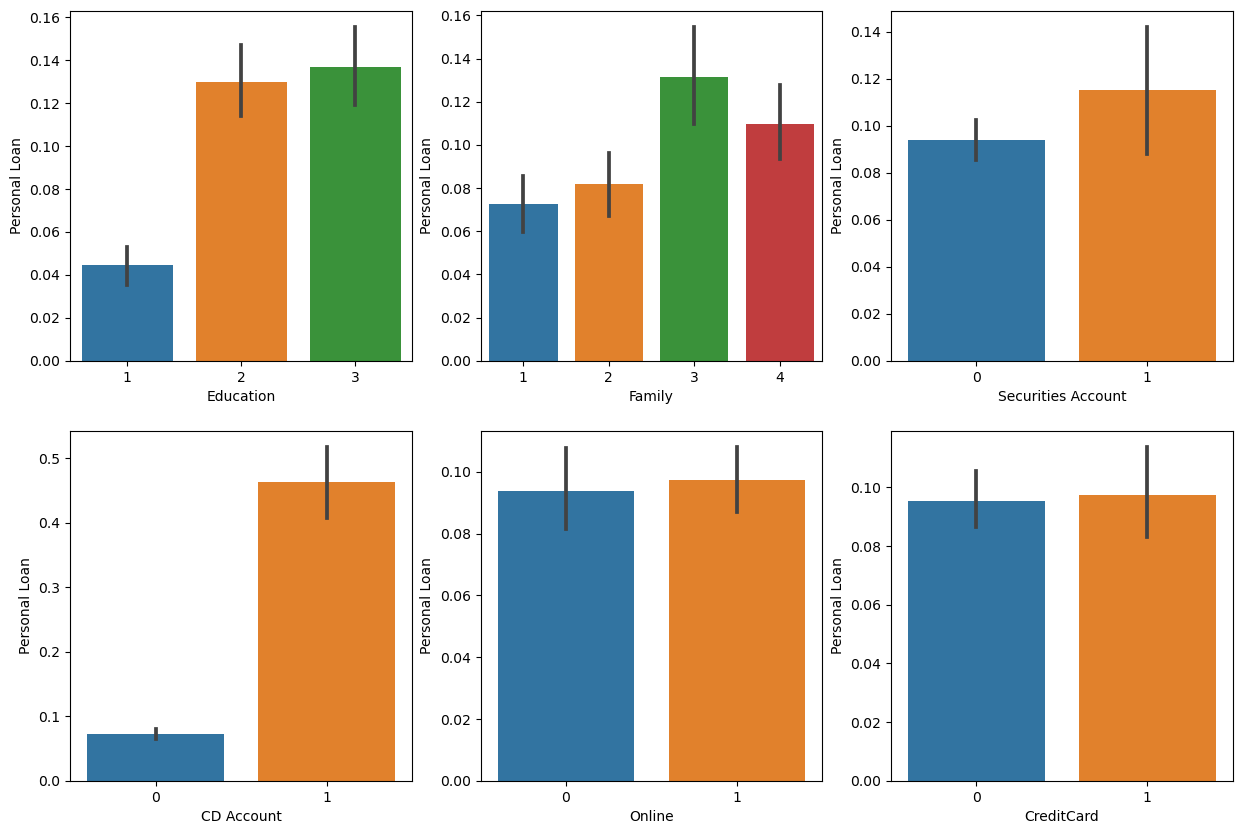

In [18]:
# proportion of successful Personal Loan approvals for each category 

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for i, var in enumerate(cat_vars):
    sns.barplot(x=var, y='Personal Loan', data=df, ax=axes[i//3, i%3])

plt.show()

In [19]:
X_df = df.drop(['ID', 'Personal Loan', 'ZIP Code'], axis= 1)
y_df = df['Personal Loan']

In [20]:
####### --------------------------- Logistic Model --------------------------------------

In [21]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets using the train_test_split function from sklearn's model_selection module
# X_df contains the features and y_df contains the target variable
# test_size parameter specifies the proportion of the data to be included in the test split
# random_state is used to set the random seed for reproducibility

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_df, y_df, test_size= 0.3, random_state= 46)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Create an instance of the LogisticRegression model
lr = LogisticRegression(max_iter=1000)

# Train the model on the training data
lr.fit(X_train, y_train)

# calculate the score of the model
lr_score = lr.score(X_test, y_test)
y_predict = lr.predict(X_test)

In [23]:
print('Model Score: ', lr_score)
print('Confusion Matrix: \n',metrics.confusion_matrix(y_test, y_predict))

Model Score:  0.9593333333333334
Confusion Matrix: 
 [[1338   11]
 [  50  101]]


In [24]:
# The accuracy score looks impressive but it is unreliable as it is a score at
# model level. Let us look at class level, especially the class 1.

# summarize the fit of the model
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1349
           1       0.90      0.67      0.77       151

    accuracy                           0.96      1500
   macro avg       0.93      0.83      0.87      1500
weighted avg       0.96      0.96      0.96      1500



In [25]:
# the model has good precision for the class '1' which is good but it has low recall as compared with precision
# for this class. let's check for other models

In [26]:
###### ----------------------- Naive Bayes Model ---------------------------------

In [27]:
# Import Gaussian Naive Bayes algorithm from scikit-learn
from sklearn.naive_bayes import GaussianNB

# Instantiate the model
nb = GaussianNB()

# Fit the model to the training data
nb.fit(X_train, y_train)

# Evaluate the accuracy of the model on the test data
nb_score = nb.score(X_test, y_test)

# Make predictions on the test data using the fitted model
y_predict = nb.predict(X_test)

In [28]:
print('Model Score: ', nb_score)
print('Confusion Matrix: \n',metrics.confusion_matrix(y_test, y_predict),'\n')
print(metrics.classification_report(y_test, y_predict))

Model Score:  0.89
Confusion Matrix: 
 [[1243  106]
 [  59   92]] 

              precision    recall  f1-score   support

           0       0.95      0.92      0.94      1349
           1       0.46      0.61      0.53       151

    accuracy                           0.89      1500
   macro avg       0.71      0.77      0.73      1500
weighted avg       0.91      0.89      0.90      1500



In [29]:
# for Naive Bayes, we get low accuracy, recall and precision. this model is performing worse than Logistic Regression

In [30]:
#####  ------------------------------ K Nearest Neighbours ------------------------------------

In [31]:
X_train.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
456,64,39,42,3,0.5,2,116,0,0,1,0
4480,55,30,145,2,6.0,3,0,0,0,1,0
3564,33,7,29,1,0.6,3,0,0,0,0,0
587,50,24,94,1,4.9,1,272,0,0,1,0
2634,34,9,75,1,2.8,1,194,0,0,0,0


In [32]:
# standardize (scale) the continuous features for the next models

from sklearn.preprocessing import StandardScaler

# select continuous features
continuous_features = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

# create a scaler object
scaler = StandardScaler()

# fit and transform the continuous features
X_train[continuous_features] = scaler.fit_transform(X_train[continuous_features])
X_test[continuous_features] = scaler.transform(X_test[continuous_features])


In [33]:
X_train.head()

# the values for the specified continuous variables have been Normalized

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
456,1.640421,1.666199,-0.689219,3,-0.827920,2,0.623513,0,0,1,0
4480,0.857611,0.879360,1.531802,2,2.285320,3,-0.546716,0,0,1,0
3564,-1.055923,-1.131448,-0.969542,1,-0.771315,3,-0.546716,0,0,0,0
587,0.422717,0.354802,0.432073,1,1.662672,1,2.197268,0,0,1,0
2634,-0.968944,-0.956595,0.022370,1,0.473981,1,1.410390,0,0,0,0


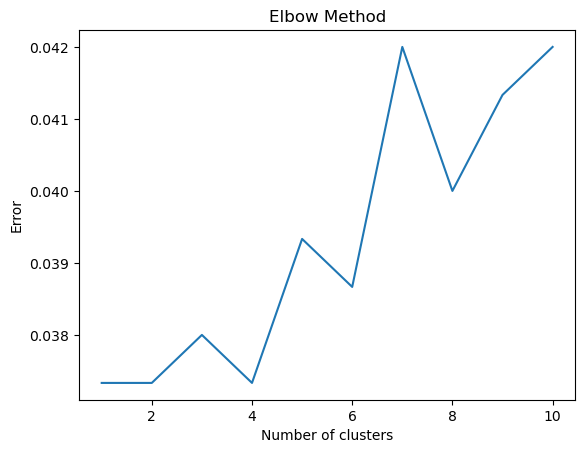

In [34]:
from sklearn.neighbors import KNeighborsClassifier

# plot the elbow curve for K against the error to find the optimal value of K

# create an empty list to store the error values for different k values
score_error = []

# iterate over different values of K to find the optimal value
for k in range(1, 11):
    
    # create a KNeighborsClassifier object with specified K value and distance-weighted algorithm
    knc = KNeighborsClassifier(n_neighbors=k, weights= 'distance')
    
    # fit the KNN model on training data
    knc.fit(X_train, y_train)
    
    # calculate the error rate on test data and append it to the list
    score_error.append(1-knc.score(X_test, y_test))
    
# plot the elbow curve
plt.plot(range(1, 11), score_error)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Error')
plt.show()  

In [35]:
# here i'm getting increasing error with increase in K. This is not usually the case in KNN but it is also not Impossibe
# to get a graph like this. Sometimes it also depends on the dataset.

# However, i've also plotted elbow curve for Recall and Precision since they are more important than the model accuracy
# in this case where the positve classes in the target column are few in number

# use GridSearchCV for cross-validation to evaluate the model performance and find the optimal K

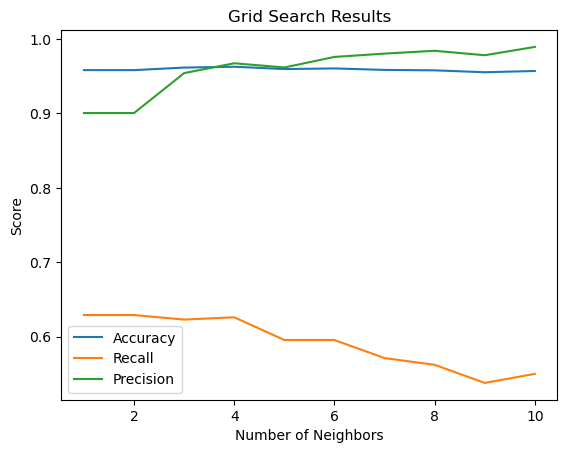

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# define the range of hyperparameters to test
param_grid = {'n_neighbors': range(1, 11), 'weights': ['distance']}

# define the scoring methods
scoring = ['accuracy', 'recall', 'precision']

# create the GridSearchCV object with all scoring methods
grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, scoring=scoring, refit=False, cv=5)

# fit the grid object to the data
grid.fit(X_train, y_train)

# extract the results for each scoring method
accuracy_scores = grid.cv_results_['mean_test_accuracy']
recall_scores = grid.cv_results_['mean_test_recall']
precision_scores = grid.cv_results_['mean_test_precision']
k_values = range(1, 11)

# plot the results for each scoring method
plt.plot(k_values, accuracy_scores, label='Accuracy')
plt.plot(k_values, recall_scores, label='Recall')
plt.plot(k_values, precision_scores, label='Precision')
plt.legend()
plt.title('Grid Search Results')
plt.xlabel('Number of Neighbors')
plt.ylabel('Score')
plt.show()

In [37]:
# I have chosen 4 to be the best value for K as all the three- accuracy, precision and recall are good for this value
# so, lets fit a model and find the necessary metrics by setting K= 4

knc = KNeighborsClassifier(n_neighbors= 4)

knc.fit(X_train, y_train)

knc_score = knc.score(X_test, y_test)
y_predict = knc.predict(X_test)

In [38]:
print('Model Score: ', knc_score)
print('Confusion Matrix:\n',metrics.confusion_matrix(y_test, y_predict),'\n')
print(metrics.classification_report(y_test, y_predict))

Model Score:  0.954
Confusion Matrix:
 [[1348    1]
 [  68   83]] 

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1349
           1       0.99      0.55      0.71       151

    accuracy                           0.95      1500
   macro avg       0.97      0.77      0.84      1500
weighted avg       0.96      0.95      0.95      1500



In [ ]:
#####  ------------------------------ Random Forest ------------------------------------

In [44]:
from sklearn.ensemble import RandomForestClassifier

# Create a new instance of the random forest classifier
rfc = RandomForestClassifier(random_state=46)

# Define the hyperparameter grid to search over
param_grid = {
    'n_estimators': [20, 30, 50, 80, 100],
    'max_depth': [8, 10, 12, 14],
}

# Create a grid search object using the random forest classifier and hyperparameter grid
grid_search = GridSearchCV(rfc, param_grid=param_grid)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and score found by the grid search
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Use the best model to make predictions on the test data
y_predict = grid_search.predict(X_test)

In [45]:
print(best_params)
print(best_score)

{'max_depth': 12, 'n_estimators': 50}
0.9874285714285713


In [48]:
rfc = RandomForestClassifier(n_estimators= 50, max_depth= 12, random_state=42)

rfc.fit(X_train, y_train)

rfc_score = rfc.score(X_test, y_test)
y_predict = rfc.predict(X_test)

In [49]:
print('Model Score: ', rfc_score)
print('Confusion Matrix:\n',metrics.confusion_matrix(y_test, y_predict),'\n')
print(metrics.classification_report(y_test, y_predict))

Model Score:  0.9906666666666667
Confusion Matrix:
 [[1347    2]
 [  12  139]] 

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1349
           1       0.99      0.92      0.95       151

    accuracy                           0.99      1500
   macro avg       0.99      0.96      0.97      1500
weighted avg       0.99      0.99      0.99      1500



In [39]:
# based on the obtained results Random Forest Model is the best since it has highest recall (also highest accuracy) and 
# this is the most important metric in our case as we do not want to miss out on instances where the loan was actually
# granted. The Logistic Regression Model is the second best but still there is a big difference between the it and the 
# Random Forest Model